In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [ ]:
path = r"/content/EastWestAirlines.xlsx"

In [ ]:
data = pd.read_excel(path)

In [ ]:
print(data)

      Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0       28143           0          1          1          1          174   
1       19244           0          1          1          1          215   
2       41354           0          1          1          1         4123   
3       14776           0          1          1          1          500   
4       97752           0          4          1          1        43300   
...       ...         ...        ...        ...        ...          ...   
3994    18476           0          1          1          1         8525   
3995    64385           0          1          1          1          981   
3996    73597           0          3          1          1        25447   
3997    54899           0          1          1          1          500   
3998     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1      

In [ ]:
data = data.iloc[:, 1:]

In [ ]:
pca = PCA(n_components=3)
data_pca = pca.fit_transform(data)

In [ ]:
hc = AgglomerativeClustering(n_clusters=5)
hc_labels = hc.fit_predict(data_pca)

In [ ]:
scores = []
max_clusters = 10
for n_clusters in range(2, max_clusters + 1):
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++')
    kmeans.fit(data_pca)
    labels = kmeans.labels_
    score = silhouette_score(data_pca, labels)
    scores.append(score)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

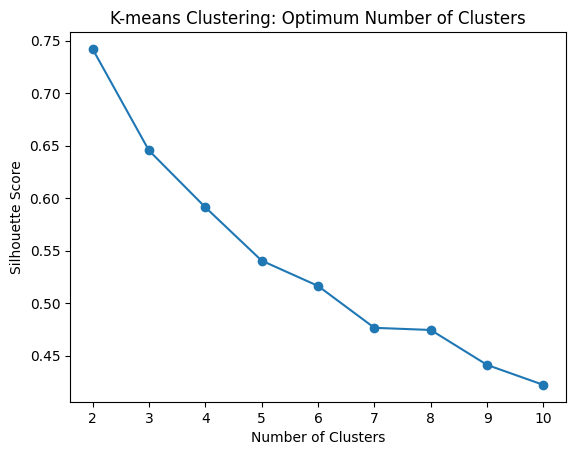

In [ ]:
plt.plot(range(2, max_clusters + 1), scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('K-means Clustering: Optimum Number of Clusters')
plt.show()

In [ ]:
optimum_clusters = scores.index(max(scores)) + 2
kmeans = KMeans(n_clusters=optimum_clusters, init='k-means++')
kmeans_labels = kmeans.fit_predict(data_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(data_pca)

In [ ]:
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

Text(0, 0.5, 'Component 2')

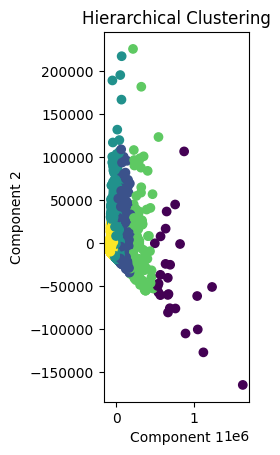

In [ ]:
plt.subplot(1, 3, 1)
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=hc_labels, cmap='viridis')
plt.title('Hierarchical Clustering')
plt.xlabel('Component 1')
plt.ylabel('Component 2')

Text(0, 0.5, 'Component 2')

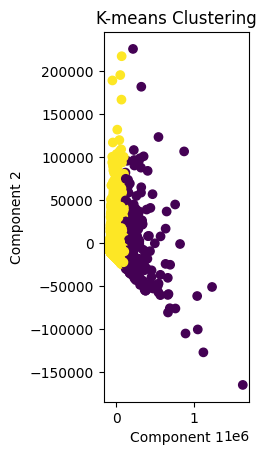

In [ ]:
plt.subplot(1, 3, 2)
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('K-means Clustering')
plt.xlabel('Component 1')
plt.ylabel('Component 2')

Text(0, 0.5, 'Component 2')

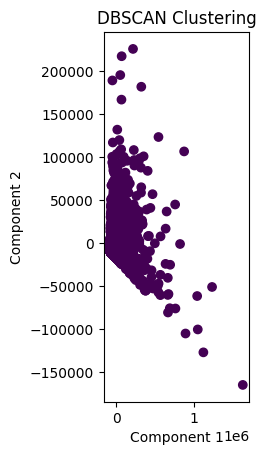

In [ ]:
plt.subplot(1, 3, 3)
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=dbscan_labels, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('Component 1')
plt.ylabel('Component 2')

In [ ]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

The Optimum number of Clusters is 7.